# Chapter 10 In-chapter examples

In [2]:
# import libraries and define global settings
import numpy as np
import scipy.stats as stats

import matplotlib.pyplot as plt

In [3]:
# define global figure properties
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg') # display figures in vector format
plt.rcParams.update({'font.size':14,             # font size
                     'axes.titlelocation':'left',# title location
                     'axes.spines.right':False,  # remove axis bounding box
                     'axes.spines.top':False,    # remove axis bounding box
                     })

### Fig 10.2: Empirical distribution under $H_0$

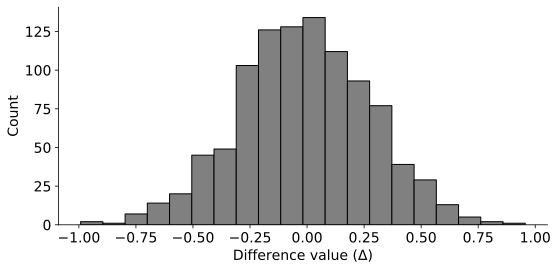

In [6]:
N = 100 # per group per sample
numExps = 1000

meandiff = np.zeros(numExps)

# run the experiment
for i in range(numExps):
  pre = stats.truncnorm(a=-5,b=10,loc=6,scale=2).rvs(N)
  pst = stats.truncnorm(a=-5,b=10,loc=6,scale=2).rvs(N)

  meandiff[i] = np.mean(pst) - np.mean(pre)


plt.figure(figsize=(8,4))
plt.hist(meandiff,bins=20,edgecolor='k',color='gray')
plt.xlabel(r'Difference value ($\Delta$)')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

### Fig 10.3: Distribution assuming $H_0$ is true

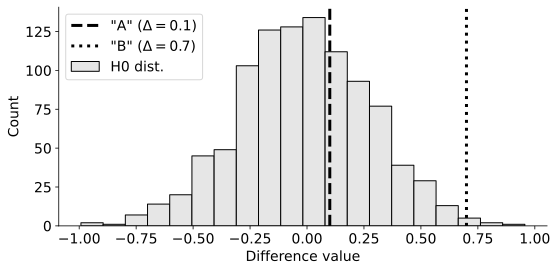

In [9]:
plt.figure(figsize=(8,4))

plt.hist(meandiff,bins=20,edgecolor='k',color=(.9,.9,.9))
plt.axvline(.1,color='k',linestyle='--',linewidth=3)
plt.axvline(.7,color='k',linestyle=':',linewidth=3)
plt.xlabel('Difference value')
plt.ylabel('Count')
plt.legend([r'"A" ($\Delta = 0.1$)',r'"B" ($\Delta = 0.7$)','H0 dist.'])

plt.tight_layout()
plt.show()

### Fig 10.4: analytical vs. empirical $H_0$ Distribution

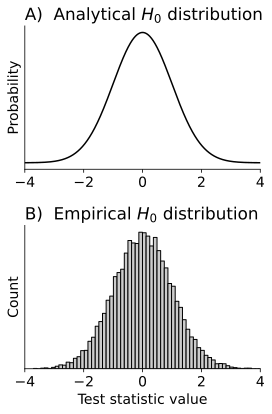

In [11]:
empirical = np.random.normal(loc=0,scale=1,size=10000)
x = np.linspace(-4,4,1001)
analytical = stats.norm.pdf(x) * np.diff(x[:2])

_,axs = plt.subplots(2,1,figsize=(4,6))

axs[0].plot(x,analytical,'k')
axs[0].set_title(r'A)  Analytical $H_0$ distribution')
axs[0].set(xlim=[-4,4],yticks=[],ylabel='Probability')

axs[1].hist(empirical,bins='fd',color=(.8,.8,.8),edgecolor='k')
axs[1].set_title(r'B)  Empirical $H_0$ distribution')
axs[1].set(xlim=[-4,4],yticks=[],ylabel='Count',xlabel='Test statistic value')

plt.tight_layout()
plt.show()